In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Advanced Goals (Report)

    1.) Get the degrees of separation for 1000 random pages. Find the median degree of separation as well as the distribution.
    
    2.) Considering your results, and the size of the English Wikipedia, estimate how many pages there are of degree 6.
    
    3.) Try a foreign language Wikipedia. Following the same rules above, determine the network structure. 
    Is there is a page a page that all others tend to lead back to? 
    Does it tend to loop more? 
    In any case, are the degrees generally shorter/longer?

# Loading the data

In [2]:
def load_data(folder_path):

# Path to the folder containing the CSV files
# folder_path = 'en_conso'

# List to hold individual DataFrames
    dfs = []

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)
    df = df.drop_duplicates()
    del dfs
    print(f'Consolidated dataframe shape: {df.shape}')
    # df.head()
    return df

# Plotting the distribution of Degrees of Separation

In [3]:
def plot_dos(df,med, mean):
    # df['DoS'].plot(kind="hist", bins=20, title = 'DOS Distribution');
    fig, ax = plt.subplots()
    
    ax.hist(df['Degrees of Separation'], alpha = 0.6)
    
    ax.set_title('DOS Distribution')
    ax.set_xlabel('Degrees of Separation')
    ax.set_ylabel('Frequency')
    
    ax.axvline(med, color='r', linestyle = '--')
    ax.axvline(mean, color='g', linestyle = '--')

# Median of the DoS

In [4]:
def get_median(df):
    median = df['DoS'].median()
    print(f'Median: {median}')
    return median

# Mean of the DoS

In [5]:
def get_mean(df):
    mean = df['DoS'].mean()
    print(f'Mean: {mean}')
    return mean

# Percentage of DoS=6

In [6]:
def get_percentage(df):
    return df.query('DoS == 6')

# 1.a  Loading consolidated EN data

In [7]:
en = load_data('en_conso')
en.head()

Consolidated dataframe shape: (1000, 4)


,Start,DoS,Path,Msg
0,/wiki/Edward_D._Brown,13.0,['https://en.wikipedia.org/wiki/Edward_D._Brow...,OK - normal path.
1,/wiki/Barbara_Wiese,14.0,['https://en.wikipedia.org/wiki/Barbara_Wiese'...,OK - short path at /wiki/Sovereign_state (last...
2,/wiki/A_Little_Bit_Longer,17.0,['https://en.wikipedia.org/wiki/A_Little_Bit_L...,OK - normal path.
3,"/wiki/Bouilly,_Aube",12.0,"['https://en.wikipedia.org/wiki/Bouilly,_Aube'...",OK - short path at /wiki/Sovereign_state (last...
4,/wiki/Vineland_Handicap,18.0,['https://en.wikipedia.org/wiki/Vineland_Handi...,OK - short path at /wiki/Natural_science (last...


# 1.b Get median and plot dos distribution

Median: 17.0


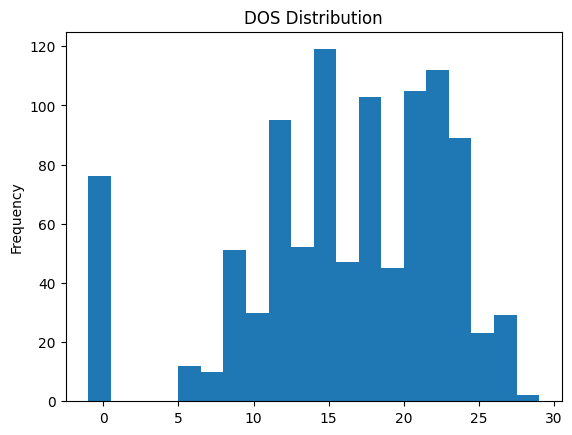

In [39]:

plot_dos(en, get_median(en), get_mean(en))


# 2. Estimate number of pages with DOS = 6

In [40]:
display(get_percentage(en))
pct_dos6 = len(en.query('DoS == 6')) / len(en) * 100
print(f"{round(pct_dos6, 2)}% of our sample has DoS = 6.")

,Start,DoS,Path,Msg
20,/wiki/Amedeo_Agostini,6.0,['https://en.wikipedia.org/wiki/Amedeo_Agostin...,OK - short path at /wiki/Mathematics (last idx...
51,/wiki/Aladdin_(BlackRock),6.0,['https://en.wikipedia.org/wiki/Aladdin_(Black...,OK - normal path.
438,/wiki/Karl_Hanke,6.0,"['https://en.wikipedia.org/wiki/Karl_Hanke', '...",OK - normal path.
478,/wiki/Two-dimensional_singular-value_decomposi...,6.0,['https://en.wikipedia.org/wiki/Two-dimensiona...,OK - short path at /wiki/Mathematics (last idx...
508,/wiki/List_of_National_Trust_properties_in_Aus...,6.0,['https://en.wikipedia.org/wiki/List_of_Nation...,OK - short path at /wiki/Action_(philosophy) (...
592,/wiki/Gay_Men%27s_Press,6.0,['https://en.wikipedia.org/wiki/Gay_Men%27s_Pr...,OK - normal path.
606,/wiki/Loxford_School,6.0,['https://en.wikipedia.org/wiki/Loxford_School...,OK - short path at /wiki/Education (last idx: 2).
729,/wiki/Smooth_projective_plane,6.0,['https://en.wikipedia.org/wiki/Smooth_project...,OK - short path at /wiki/Geometry (last idx: 1).
944,/wiki/Lewandowski-Kurowicka-Joe_distribution,6.0,['https://en.wikipedia.org/wiki/Lewandowski-Ku...,OK - short path at /wiki/Mathematics (last idx...


0.9% of our sample has DoS = 6.


According to [Wikipedia](https://en.wikipedia.org/wiki/Wikipedia:Size_of_Wikipedia), there are 6,823,122 English Wiki articles as of May 2024. According to our results, only 0.31% of Wiki Articles have $DoS = 6$ to the Philosophy page. We estimate around 31.5K articles having DoS=6 in English Wikipedia.

In [20]:
print(f"Estimation of the num of articles with DoS = 6: {round(6823122 * pct_dos6 / 100, 2)}")

Estimation of the num of articles with DoS = 6: 47485.84
